# NLP - Session 7 - Combining NLP Models and Creation of Custom rules using SpaCy

#### Objective: 

In this article, we are going to create some custom rules for our requirements and will add that to our pipeline like explanding named entities and identifying person’s organization name from a given text.

For example: For example, the corpus spaCy’s English models were trained on defines a PERSON entity as just the person name, without titles like “Mr” or “Dr”. This makes sense because it makes it easier to resolve the entity type back to a knowledge base. But what if your application needs the full names, including the titles?

 - Mr. Laxmi Kant
 - Mr. Roshan Kumar Gupta
 
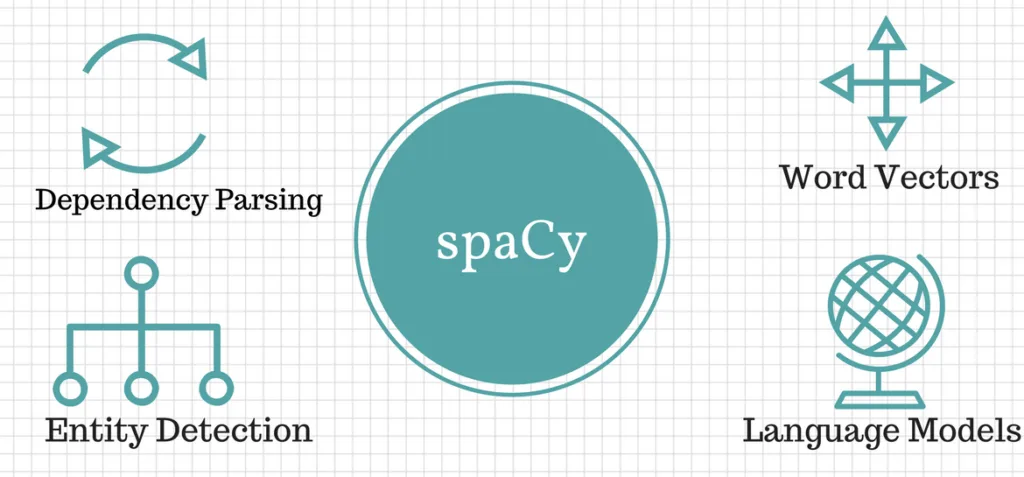

#### SpaCy
If a normal data analysis tool in Python for tabular and structured data has Pandas, then the data analysis tool in Natural Language Processing (NLP) for text and unstructured data has SpaCy.

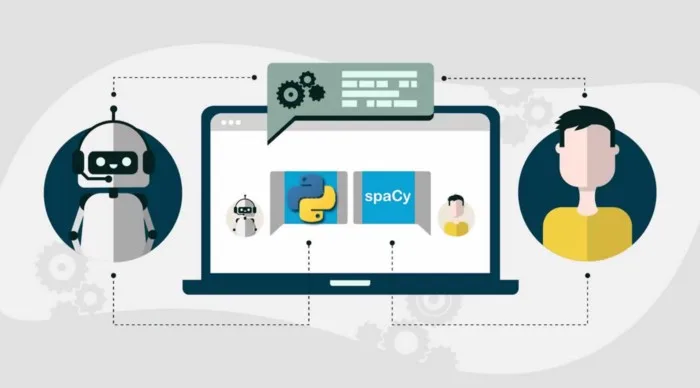

When you’re first starting out as a data scientist, chances are you’ll be dealing with structured data which doesn’t necessarily require spaCy to handle complicated text data, depending on your needs.

In most cases — Pandas will fit your usage as it’s powerful enough to do most of the data cleaning and analysis for structured data.

Once you start dealing with unstructured text data — basically NLP stuff — where this can no longer be handled by Pandas, this is when spaCy comes in with tons of in-built capabilities to process, analyze and even understand these data through sophisticated and efficient NLP techniques.

SpaCy provides a one-stop-shop for tasks commonly used in any NLP project, including:

 - Tokenisation
 - Lemmatisation
 - Part-of-speech tagging
 - Entity recognition
 - Dependency parsing
 - Sentence recognition
 - Word-to-vector transformations And Many convenience methods for cleaning and normalising text
 
By the end of this article, I hope you’ll understand more about spaCy and how you could leverage this powerful tool in your domain space as well as other areas.

You can combine statistical and rule-based components in a variety of ways. Rule-based components can be used to improve the accuracy of statistical models, by presetting tags, entities, or sentence boundaries for specific tokens. The statistical models will usually respect these preset annotations, which sometimes improves the accuracy of other decisions. You can also use rule-based components after a statistical model to correct common errors. Finally, rule-based components can reference the attributes set by statistical models, in order to implement more abstract logic.

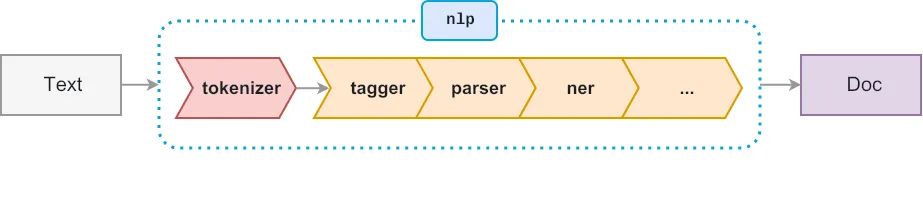

In [ ]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp("Dr. Alex Smith chaired first board meeting at Google")
doc

In [ ]:
print([(ent.text, ent.label_) for ent in doc.ents])

#### Use of Name Entity Recognition
Now we are creating our rule to add a title along with entity where entity label is PERSON.

Below are the steps which we are peforming:

 - Creating a function that will take input.
 - Iterating over each word or token or doc, if any token is having entity label as PERSON and its starting position is not zero.
 - Checking if the previous token is having values in (‘Dr’, ‘Dr.’, ‘Mr’, ‘Mr.’).
 - Then using Span() we are creating a rule which will take PERSON label from starting position of title till the end of the name.
 - And then assigning the value back to token entity values.

In [ ]:
def add_title(doc):
    new_ents = []
    for ent in doc.ents:
        if ent.label_ == "PERSON" and ent.start != 0:
            prev_token = doc[ent.start - 1]
            if prev_token.text in ("Dr", "Dr.", "Mr", "Mr."):
                new_ent = Span(doc, ent.start - 1, ent.end, label=ent.label)
                new_ents.append(new_ent)
            else:
                new_ents.append(ent)
    doc.ents = new_ents
    return doc

In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe(add_title, after="ner")

In [ ]:
doc = nlp("Dr. Alex Smith chaired first board meeting at Google")
doc

In [ ]:
print([(ent.text, ent.label_) for ent in doc.ents])

#### Use of POS and Dep Parsing
 - Parts-of-speech(POS) tagging is the process of tagging words in textual input with their appropriate parts of speech and Dependency parsing refers to understanding the structure of a sentence via dependencies between words in a sentence. When a sentence is dependency parsed it would give us information about relationships between words in a sentence.

 - Parsers break up a sentence into a subject and an object which is a noun phrase and a verb phrase. Dependency parser considers the verb as ahead of the sentence and all dependencies are built around it.

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp("Alex Smith was working at Google")
doc

In [ ]:
displacy.render(doc, style="dep", options={"compact": True, "distance": 100})

In [ ]:
def get_person_orgs(doc):
    person_entities = [ent for ent in doc.ents if ent.label_ == "PERSON"]
    for ent in person_entities:
        head = ent.root.head
        if head.lemma_ == "work":
            preps = [token for token in head.children if token.dep_ == "prep"]
            for prep in preps:
                orgs = [token for token in prep.children if token.ent_type_ == "ORG"]
                print({"person": ent, "orgs": orgs, "past": head.tag_ == "VBD"})
    return doc

In [ ]:
from spacy.pipeline import merge_entities

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp.add_pipe(merge_entities)

In [ ]:
nlp.add_pipe(get_person_orgs)

In [ ]:
doc = nlp("Alex Smith worked at Google")
doc

## Modify model

In [ ]:
def get_person_orgs(doc):
    person_entities = [ent for ent in doc.ents if ent.label_ == "PERSON"]
    for ent in person_entities:
        head = ent.root.head
        if head.lemma_ == "work":
            preps = [token for token in head.children if token.dep_ == "prep"]
            for prep in preps:
                orgs = [token for token in prep.children if token.ent_type_ == "ORG"]

                aux = [token for token in head.children if token.dep_ == "aux"]
                past_aux = any(t.tag_ == "VBD" for t in aux)
                past = head.tag_ == "VBD" or head.tag_ == "VBG" and past_aux

            print({"person": ent, "orgs": orgs, "past": past})
    return doc

In [ ]:
from spacy.pipeline import merge_entities

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp.add_pipe(merge_entities)

In [ ]:
nlp.add_pipe(get_person_orgs)

In [ ]:
doc = nlp("Alex Smith was working at Google")
doc

## Summary
In the above article :

1. We have created a rule in which we have included Title as well with entity classify as PERSON as an example of name entity recognition.

2. We have used POS and Dependency Parsing to create a rule to get a person’s organization.